In [9]:
def step_function(x: float) -> float:
    return 1.0 if x >= 0 else 0.0

from vector_operations import Vector, dot;

def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
    """Returns 1 if the perceptron fires, else returns 0"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)
    
and_weights = [2., 2.]
and_bias = -3.

print(f"perceptron_output(and_weights, and_bias, [1, 1]) = {perceptron_output(and_weights, and_bias, [1, 1])}")
print(f"perceptron_output(and_weights, and_bias, [0, 1]) = {perceptron_output(and_weights, and_bias, [0, 1])}")
print(f"perceptron_output(and_weights, and_bias, [1, 0]) = {perceptron_output(and_weights, and_bias, [1, 0])}")
print(f"perceptron_output(and_weights, and_bias, [0, 0]) = {perceptron_output(and_weights, and_bias, [0, 0])}")

perceptron_output(and_weights, and_bias, [1, 1]) = 1.0
perceptron_output(and_weights, and_bias, [0, 1]) = 0.0
perceptron_output(and_weights, and_bias, [1, 0]) = 0.0
perceptron_output(and_weights, and_bias, [0, 0]) = 0.0


In [10]:
or_weights = [2., 2.]
or_bias = -1.

print(f"perceptron_output(or_weights, or_bias, [1, 1]) = {perceptron_output(or_weights, or_bias, [1, 1])}")
print(f"perceptron_output(or_weights, or_bias, [0, 1]) = {perceptron_output(or_weights, or_bias, [0, 1])}")
print(f"perceptron_output(or_weights, or_bias, [1, 0]) = {perceptron_output(or_weights, or_bias, [1, 0])}")
print(f"perceptron_output(or_weights, or_bias, [0, 0]) = {perceptron_output(or_weights, or_bias, [0, 0])}")

perceptron_output(or_weights, or_bias, [1, 1]) = 1.0
perceptron_output(or_weights, or_bias, [0, 1]) = 1.0
perceptron_output(or_weights, or_bias, [1, 0]) = 1.0
perceptron_output(or_weights, or_bias, [0, 0]) = 0.0


In [13]:
not_weights = [-2.]
not_bias = 1.
print(f"perceptron_output(not_weights, not_bias, [1]) = {perceptron_output(not_weights, not_bias, [1.])}")
print(f"perceptron_output(not_weights, not_bias, [0]) = {perceptron_output(not_weights, not_bias, [0.])}")

perceptron_output(not_weights, not_bias, [1]) = 0.0
perceptron_output(not_weights, not_bias, [0]) = 1.0


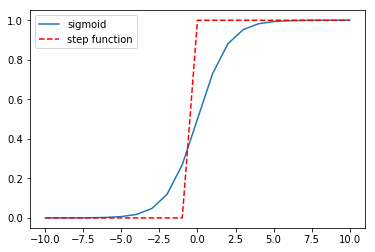

In [41]:
import math

def sigmoid(t: float) -> float:
    return 1.0 / (1 + math.exp(-t))


t = [i for i in range(-10,11,1)]
sigmoid_t = [sigmoid(x) for x in t]
step_t = [step_function(x) for x in t]

import matplotlib.pyplot as plt
plt.plot(t, sigmoid_t, label = 'sigmoid')
plt.plot(t, step_t, 'r--', label = 'step function')
plt.legend()
plt.show()

In [49]:
def neuron_output(weights: Vector, inputs: Vector) -> float:
    """Weights include a bias terms, input includes a 1."""
    return sigmoid(dot(weights, inputs))

from typing import List

def feed_forward(neural_network: List[List[Vector]],
                input_vector: Vector) -> List[Vector]:
    
    """Feeds the input vector through the neural network.
    Returns the outputs of all layers (not just the last one)."""
    
    outputs: List[Vector] = []
        
    for layer in neural_network:
        input_with_bias = input_vector + [1.0] # Adds a constant for bias
        output = [neuron_output(input_with_bias, neuron)
                 for neuron in layer]
        outputs.append(output)
        
        # Then the input to the next layer is the output of this layer
        input_vector = output
        
    return outputs

In [51]:
xor_network = [# hidden layer
              [[-20., 20, -30], # 'and neuron'
              [20., 20, -10]],   # 'or neuron'
              # Output layer
              [[-60., 60., -30.]]]

print(f"feed_forward(xor_network, [1, 1]) = {feed_forward(xor_network, [1, 1])[-1][0]}")
print(f"feed_forward(xor_network, [0, 1]) = {feed_forward(xor_network, [0, 1])[-1][0]}")
print(f"feed_forward(xor_network, [1, 0]) = {feed_forward(xor_network, [1, 0])[-1][0]}")
print(f"feed_forward(xor_network, [0, 0]) = {feed_forward(xor_network, [0, 0])[-1][0]}")

feed_forward(xor_network, [1, 1]) = 0.9999999999999065
feed_forward(xor_network, [0, 1]) = 0.9999999999999059
feed_forward(xor_network, [1, 0]) = 0.9999999999999061
feed_forward(xor_network, [0, 0]) = 9.38314668300676e-14


In [55]:
def sqerror_gradients(network: List[List[Vector]],
                     input_vector: Vector,
                     target_vector: Vector) -> List[List[Vector]]:
    """Given a neural network, an input vector and a target vector,
    makes a prediction and computes the gradient of squared error loss
    with respect to the neuron weights."""
    
    # forward pass
    hidden_outputs, outputs = feed_forward(network, input_vector)
    
    # gradients  with respect to output neuron pre-activation outputs
    output_deltas = [output*(1-output)*(output-target)
                    for output, target in zip(outputs, target_vector)]

    # gradients with respect to output neuron weights
    output_grads = [[output_deltas[i] * hidden_output
                    for hidden_output in hidden_outputs + [1]]
                    for i, output_neuron in enumerate(network[-1])]
    
    # gradients with respect to hidden neuron pre-activation outputs
    hidden_delats = [hidden_output*(1-hidden_output)*
                     dot(output_deltas,[n[i] for n in network[-1]])
                    for i, hidden_output in enumerate(hidden_outputs)]

    # gradients with respect to hidden neuron weights
    hidden_grads = [[hidden_delats[i] * input for input in input_vector + [1]]
                   for i, hidden_neuron in enumerate(network[0])]
    
    return [hidden_grads, output_grads]

In [81]:
# Learn the neural network for XOR operation

import random
random.seed(0)

# training data
xs = [[0.,0.],[0.,1.],[1.,0.],[1.,1.]]
ys = [[0.], [1.], [1.], [0.]]

# start with random weights
network = [# hidden layer: 2 inputs -> 2 outputs
            [[random.random() for _ in range(2 + 1)], # 1st hidden neuron
            [random.random() for _ in range(2 + 1)]], # 2nd hidden neuron
            # output layer: 2 inputs -> 1 output
            [[random.random() for _ in range(2 + 1)]] # 1st output neuron
            ]

from gradient_descent import gradient_step;

learning_rate = 1.0

import tqdm

for epoch in tqdm.trange(20000, desc = "neural net for xor"):
    for x,y in zip(xs, ys):
        gradients = sqerror_gradients(network, x, y)
        
        # Take a gradient step for each neuron in the layer
        network = [[gradient_step(neuron, grad, -learning_rate)
                   for neuron, grad in zip(layer, layer_grad)]
                  for layer, layer_grad in zip(network, gradients)]
        


neural net for xor: 100%|██████████| 20000/20000 [00:01<00:00, 10470.35it/s]


In [82]:
print(f"feed_forward(network, [0,0])[-1][0] = {feed_forward(network, [0,0])[-1][0]}")
print(f"feed_forward(network, [0,1])[-1][0] = {feed_forward(network, [0,1])[-1][0]}")
print(f"feed_forward(network, [1,0])[-1][0] = {feed_forward(network, [1,0])[-1][0]}")
print(f"feed_forward(network, [1,1])[-1][0] = {feed_forward(network, [1,1])[-1][0]}")

feed_forward(network, [0,0])[-1][0] = 0.009033699537611711
feed_forward(network, [0,1])[-1][0] = 0.9923292625479107
feed_forward(network, [1,0])[-1][0] = 0.9923280275107558
feed_forward(network, [1,1])[-1][0] = 0.007855695468228051


In [84]:
# fizz-buzz problem

def fizz_buzz_encode(x: int) -> Vector:
    if x % 15 == 0:
        return [0,0,0,1]
    elif x % 5 == 0:
        return [0,0,1,0]
    elif x % 3 == 0:
        return [0,1,0,0]
    else:
        return [1,0,0,0]
    
print(fizz_buzz_encode(2))
print(fizz_buzz_encode(6))
print(fizz_buzz_encode(25))
print(fizz_buzz_encode(45))


[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


In [91]:
def binary_encode(x: int) -> Vector:
    binary: List[float] = []
        
    for i in range(10):
        binary.append(x%2)
        x = x // 2
    return binary

binary_encode(3)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [96]:
xs = [binary_encode(n) for n in range(101,1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]

NUM_HIDDEN = 25 # Number of hidden neurons

network = [# hidden layers: 10 inputs -> NUM_HIDDEN outputs
    [[random.random() for _ in range(10 + 1)] for _ in range(NUM_HIDDEN)],
    # Output_layer: NUM_HIDDEN inputs -> 4 outputs
    [[random.random() for _ in range(NUM_HIDDEN + 1)] for _ in range(4)]
]

from vector_operations import squared_distance

learning_rate = 1.0

with tqdm.trange(500) as t:
    for epoch in t:
        epoch_loss = 0.0
        
        for x,y in zip(xs, ys):
            predicted = feed_forward(network, x)[-1]
            epoch_loss += squared_distance(predicted, y)
            gradients = sqerror_gradients(network, x, y)
            
            # Take gradient step for each neuron in each layer
            network = [[gradient_step(neuron, grad, -learning_rate)
                       for neuron, grad in zip(layer, layer_grad)]
                      for layer, layer_grad in zip(network, gradients)]
            
        t.set_description(f"fizz buzz (loss: {epoch_loss})")

fizz buzz (loss: 68.31202645765546): 100%|██████████| 500/500 [02:58<00:00,  2.88it/s] 


In [97]:
def argmax(xs: list) -> int:
    """Returns the index of the largest value"""
    return max(range(len(xs)), key = lambda i: xs[i])

In [100]:
num_correct = 0

for n in range(1,101):
    x = binary_encode(n)
    predicted = argmax(feed_forward(network, x)[-1])
    actual = argmax(fizz_buzz_encode(n))
    labels = [str(n), "fizz","buzz","fizzbuzz"]
    print(n, labels[predicted], labels[actual])
    
    if predicted == actual:
        num_correct += 1
        
print(num_correct, "/", 100)

1 1 1
2 2 2
3 fizz fizz
4 buzz 4
5 buzz buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 13 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 buzz buzz
21 fizz fizz
22 22 22
23 23 23
24 fizz fizz
25 buzz buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 fizz fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 fizz fizz
64 64 64
65 65 buzz
66 fizz fizz
67 67 67
68 68 68
69 fizz fizz
70 buzz buzz
71 71 71
72 fizz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 77 77
78 fizz fizz
79 79 79
80 80 buzz
81 81 fizz
82 82 82
83 83 83
84 fizz fizz
85 buzz buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz fizzb